# ResNet architectures

It was found within Kaggle (https://www.kaggle.com/c/histopathologic-cancer-detection/overview) that many notebooks consist of ResNet architectures, and therefore (combined with the low amount of MBs necessary to run them) they are chosen as initial models. This notebook consists of the four different ResNet architectures we're interested in, which are the following:
- ResNet12: self-developed model
- ResNet24: self-developed model
- ResNet40: self-developed model
- ResNet50: self-developed, and obtained from Keras

All models need to be pre-trained using data from ImageNet, since the weights of ResNet50 don't completely encompass the procedure of image recognition when multiple layers are removed. These trained models are implemented as a function formed in a different notebook (ResNetmodels.ipynb). To import these functions, a package will be used which can be downloaded in the corresponding environment with:

$ pip install ipynb --upgrade

The ipynb package setup an importhook which will automatically make available as a python module any .ipynb files as long as the import starts with ipynb.fs. (https://ipynb.readthedocs.io/en/stable/).

In [1]:
import os
import glob
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import roc_curve, auc

# Processing Data

First of all, all data (train, validation, test) need to be imported for running the results of each model

In [2]:
########### insert hyperparameters ################
train_batch_size = 32
val_batch_size = 32
###################################################

base_dir = r'C:\Users\20173884\Documents\8P361'
test_dir = r'C:\Users\20173884\Documents\8P361'

# dataset parameters
TRAIN_PATH = os.path.join(base_dir, 'train+val', 'train')
VALID_PATH = os.path.join(base_dir, 'train+val', 'valid')
TEST_FILES = glob.glob(test_dir + '\*.tif')
RESCALING_FACTOR = 1./255
IMAGE_SIZE = 96

# instantiate data generators
datagen = ImageDataGenerator(rescale=RESCALING_FACTOR)

train_gen = datagen.flow_from_directory(TRAIN_PATH,
                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                    batch_size=train_batch_size,
                                    class_mode='binary')

val_gen = datagen.flow_from_directory(VALID_PATH,
                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                    batch_size=val_batch_size,
                                    class_mode='binary',
                                    shuffle=False)

# form steps
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


# ResNet12

ResNet12 consists of the following architecture:

The architecture includes: ... (will be implemented using the research done by Allard and Marlijn)

### Preprocessing (done in another notebook)

The preprocessing step is used to form initial weights for the model, it is processed using the ImageNet data

In [3]:
from ipynb.fs.defs.ResNet_models import ResNet12

model = ResNet12()

# save the model and weights
model_name = 'ResNet12'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# serialize model to JSON
model_json = model.to_json()
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 
    
# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]

ValueError: Operands could not be broadcast together with shapes (45, 45, 256) (47, 47, 256)

In [ ]:
model.summary()

### Optimalisation 

Will be implemented using the research done by Mandy

In [ ]:
![ResNet23-1.png](attachment:ResNet23-1.png)

### Fine-tuning

Fine-tuning is started to train the model on the wanted images

In [ ]:
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

### Results

The results can be obtained in two ways, from tensorboard using 
````bash
activate 8p361
cd 'path/where/logs/are'
tensorboard --logdir logs
````
and then going to ...

Or running the code shown below

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


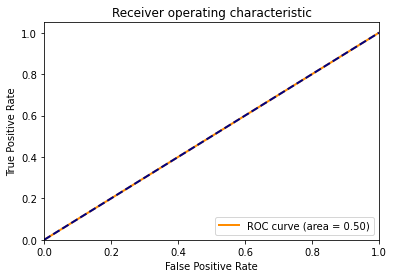

0.5

In [6]:
y = val_gen.labels                       
pred = model.predict_generator(val_gen)  
fpr, tpr, thresholds = roc_curve(y, pred) 
roc_auc = auc(fpr, tpr)

# plot results
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# ResNet24

ResNet24 consists of the following architecture:

The architecture includes: ... (will be implemented using the research done by Allard and Marlijn)

### Preprocessing (done in another notebook)

The preprocessing step is used to form initial weights for the model, it is processed using the ImageNet data

In [7]:
from ipynb.fs.defs.ResNet_models import ResNet24

model = ResNet24()

# save the model and weights
model_name = 'ResNet24'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# serialize model to JSON
model_json = model.to_json()
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 
    
# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]

### Optimalisation


Will be implemented using the research done by Mandy

### Fine-tuning

Fine-tuning is started to train the model on the wanted images

In [8]:
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1234s 273ms/step - loss: 2.6999 - accuracy: 0.4997 - val_loss: 0.4491 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.44909, saving model to ResNet11_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1113s 247ms/step - loss: 0.3913 - accuracy: 0.5016 - val_loss: 0.3696 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.44909 to 0.36959, saving model to ResNet11_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 1093s 243ms/step - loss: 0.3528 - accuracy: 0.5015 - val_loss: 0.4384 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.36959


### Results

The results can be obtained in two ways, from tensorboard using 
````bash
activate 8p361
cd 'path/where/logs/are'
tensorboard --logdir logs
````
and then going to ...

Or running the code shown below

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


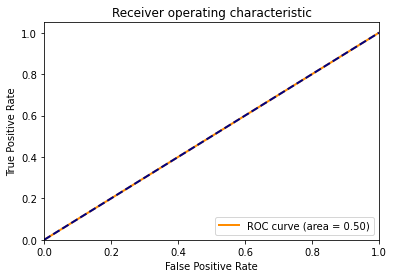

0.5

In [9]:
y = val_gen.labels                       
pred = model.predict_generator(val_gen)  
fpr, tpr, thresholds = roc_curve(y, pred) 
roc_auc = auc(fpr, tpr)

# plot results
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# ResNet40

ResNet40 consists of the following architecture:

The architecture includes: ... (will be implemented using the research done by Allard and Marlijn)

### Preprocessing (done in another notebook)

The preprocessing step is used to form initial weights for the model, it is processed using the ImageNet data

In [10]:
from ipynb.fs.defs.ResNet_models import ResNet40

model = ResNet40()

# save the model and weights
model_name = 'ResNet40'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# serialize model to JSON
model_json = model.to_json()
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 
    
# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]

### Optimalisation


Will be implemented using the research done by Mandy

### Fine-tuning

Fine-tuning is started to train the model on the wanted images

In [11]:
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1398s 309ms/step - loss: 4.7554 - accuracy: 0.4995 - val_loss: 0.5030 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.50297, saving model to ResNet11_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1380s 307ms/step - loss: 0.4158 - accuracy: 0.5013 - val_loss: 0.3644 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.50297 to 0.36436, saving model to ResNet11_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 1382s 307ms/step - loss: 0.3828 - accuracy: 0.4998 - val_loss: 0.3751 - val_accuracy: 0.5000

Epoch 00003: val_loss did not improve from 0.36436


### Results

The results can be obtained in two ways, from tensorboard using 
````bash
activate 8p361
cd 'path/where/logs/are'
tensorboard --logdir logs
````
and then going to ...

Or running the code shown below

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


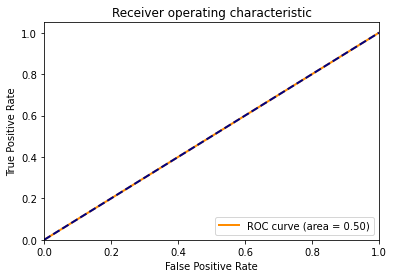

0.5

In [12]:
y = val_gen.labels                       
pred = model.predict_generator(val_gen)  
fpr, tpr, thresholds = roc_curve(y, pred) 
roc_auc = auc(fpr, tpr)

# plot results
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# ResNet50

ResNet11 consists of the following architecture:

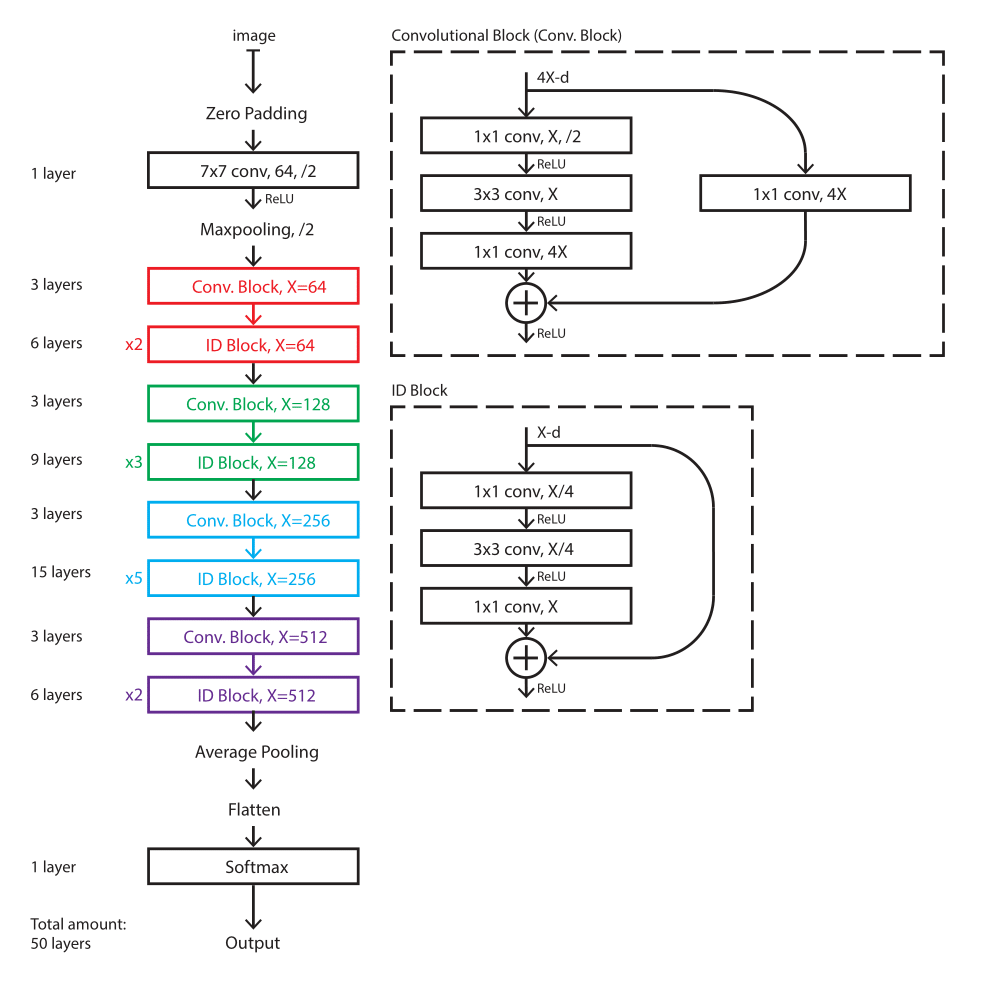

The architecture includes: ... (will be implemented using the research done by Allard and Marlijn)

### Preprocessing (done in another notebook)

The preprocessing step is used to form initial weights for the model, it is processed using the ImageNet data

In [3]:
from ipynb.fs.defs.ResNet_models import ResNet50

model = ResNet50()

# save the model and weights
model_name = 'ResNet50'
model_filepath = model_name + '.json'
weights_filepath = model_name + '_weights.hdf5'

# serialize model to JSON
model_json = model.to_json()
with open(model_filepath, 'w') as json_file:
    json_file.write(model_json) 
    
# define the model checkpoint and Tensorboard callbacks
checkpoint = ModelCheckpoint(weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tensorboard = TensorBoard(os.path.join('logs', model_name))
callbacks_list = [checkpoint, tensorboard]

model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

### Optimalisation


Will be implemented using the research done by Mandy

### Fine-tuning

Fine-tuning is started to train the model on the wanted images

In [4]:
train_steps = train_gen.n//train_gen.batch_size
val_steps = val_gen.n//val_gen.batch_size

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=3,
                    callbacks=callbacks_list)

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
4500/4500 [==============================] - 1853s 409ms/step - loss: 0.5538 - accuracy: 0.4998 - val_loss: 0.3958 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.39578, saving model to ResNet50_weights.hdf5
Epoch 2/3
4500/4500 [==============================] - 1859s 413ms/step - loss: 0.3512 - accuracy: 0.5001 - val_loss: 0.3194 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.39578 to 0.31937, saving model to ResNet50_weights.hdf5
Epoch 3/3
4500/4500 [==============================] - 1873s 416ms/step - loss: 0.3111 - accuracy: 0.5000 - val_loss: 0.2985 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.31937 to 0.29846, saving model to ResNet50_weights.hdf5


### Results

The results can be obtained in two ways, from tensorboard using 
````bash
activate 8p361
cd 'path/where/logs/are'
tensorboard --logdir logs
````
and then going to ...

Or running the code shown below

C:\Users\20173884\AppData\Local\Continuum\anaconda3\envs\8p361\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


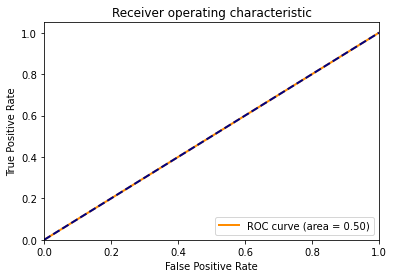

0.5

In [15]:
y = val_gen.labels                       
pred = model.predict_generator(val_gen)  
fpr, tpr, thresholds = roc_curve(y, pred) 
roc_auc = auc(fpr, tpr)

# plot results
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Comparison between different ResNets